In [142]:
# read in a text file as a list of lines
def read_file_as_lines(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [line.strip() for line in lines]

In [143]:
import re
input = read_file_as_lines('input.txt')

processed_input = input.copy()
for idx, line in enumerate(input): 
    hat_matches = [m.start() for m in re.finditer('\^', line)]
    for match in hat_matches:
        processed_input[idx+1] = processed_input[idx+1][:match-1] + '|' + processed_input[idx+1][match] + '|' + processed_input[idx+1][match+2:]
        processed_input[idx]= processed_input[idx][:match-1] + '|' + processed_input[idx][match] + '|' + processed_input[idx][match+2:]

    if idx > 0:
        line_matches = [m.start() for m in re.finditer('\|', processed_input[idx-1])]
        for match in line_matches:
            if idx < len(processed_input) and processed_input[idx][match] == '.':
                processed_input[idx] = processed_input[idx][:match] + '|' + processed_input[idx][match+1:] 

processed_input

<>:6: SyntaxWarning: invalid escape sequence '\^'
<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:6: SyntaxWarning: invalid escape sequence '\^'
<>:12: SyntaxWarning: invalid escape sequence '\|'
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_52899/75754651.py:6: SyntaxWarning: invalid escape sequence '\^'
  hat_matches = [m.start() for m in re.finditer('\^', line)]
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_52899/75754651.py:12: SyntaxWarning: invalid escape sequence '\|'
  line_matches = [m.start() for m in re.finditer('\|', processed_input[idx-1])]


['......................................................................S......................................................................',
 '.............................................................................................................................................',
 '.....................................................................|^|.....................................................................',
 '.....................................................................|.|.....................................................................',
 '....................................................................|^|^|....................................................................',
 '....................................................................|.|.|....................................................................',
 '...................................................................|^|^|^|................................................

In [144]:
# count splits
import re

count = 0
hat_count = 0
for idx, input in enumerate(processed_input):
    if idx > 1:
        splits = [m.start() for m in re.finditer('\^', input)]
        for split in splits:
            if processed_input[idx-1][split] == '|':
                count += 1


<>:8: SyntaxWarning: invalid escape sequence '\^'
<>:8: SyntaxWarning: invalid escape sequence '\^'
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_52899/3920438746.py:8: SyntaxWarning: invalid escape sequence '\^'
  splits = [m.start() for m in re.finditer('\^', input)]


In [145]:
count+1







1678

In [146]:
# PART 2

import networkx as nx
G = nx.Graph()

# translate input into graph
for idx, line in enumerate(processed_input):
    # add nodes
    for col, char in enumerate(line):
        if char in ['^']:
            G.add_node((idx, col))

        if char in ['|'] and idx == len(processed_input)-1: # last line
            G.add_node((idx, col))


                

In [147]:
# transpose processed_input
transposed_input = [''.join(row) for row in zip(*processed_input)]


In [148]:
transposed_input

['............................................................................................................................................||',
 '..........................................................................................................................................||^.',
 '........................................................................................................................................||^.||',
 '......................................................................................................................................||^.||||',
 '....................................................................................................................................||^.||^.||',
 '..................................................................................................................................||^.||^.||^.',
 '....................................................................................................................

In [149]:
depth_first_counter = 0
for col_idx, col in enumerate(transposed_input):
    # find start and end points of each vertical line
    line_positions = [m.start() for m in re.finditer('\|', col)]
    # split line position into lists of incrementing sequences
    sequences = []
    current_sequence = []
    for i in range(len(line_positions)):
        if i == 0 or line_positions[i] == line_positions[i-1] + 1:
            current_sequence.append(line_positions[i])
        else:
            sequences.append(current_sequence)
            current_sequence = [line_positions[i]]
    if current_sequence:
        sequences.append(current_sequence)

    # now for each sequence, add edges between start and end nodes
    for seq in sequences:
        if len(seq) >= 2:
            start = seq[0]
            end = seq[-1]

            while start < end:
                # check if there is a hat to the side of the start
                if start > 0 and (start, col_idx-1) in G.nodes():
                    if end == len(processed_input)-1:
                        G.add_edge((start, col_idx-1), (end, col_idx))
                        
                    else:
                        G.add_edge((start, col_idx-1), (end+1, col_idx))

                if start > 0 and (start, col_idx+1) in G.nodes():
                    if end == len(processed_input)-1:
                        G.add_edge((start, col_idx+1), (end, col_idx))
                    else:
                        G.add_edge((start, col_idx+1), (end+1, col_idx))

                start += 1
            # connect to the final layer




<>:4: SyntaxWarning: invalid escape sequence '\|'
<>:4: SyntaxWarning: invalid escape sequence '\|'
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_52899/2556165919.py:4: SyntaxWarning: invalid escape sequence '\|'
  line_positions = [m.start() for m in re.finditer('\|', col)]


3532

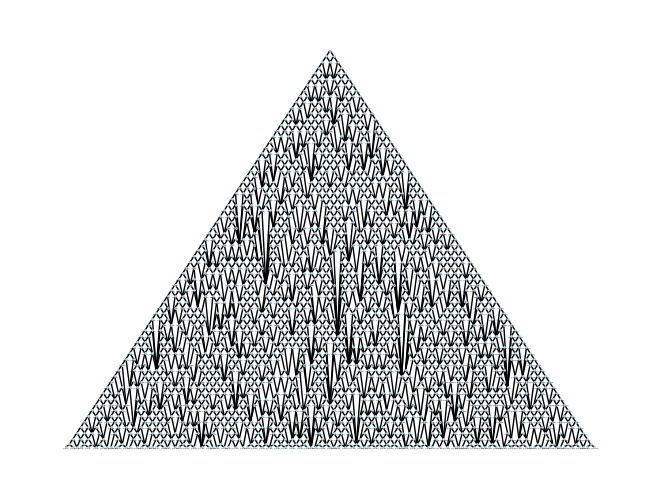

In [150]:
# plot graph and edges

pos = {node: (node[1], -node[0]) for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_size=1, node_color='lightblue', font_size=1)

G.number_of_edges()



In [151]:
start_nodes = [node for node in G.nodes() if node[0] == 2]
end_nodes = [node for node in G.nodes() if node[0] == len(processed_input)-1]

In [152]:
# make a dictionary of start node to neighbouring nodes
start_to_neighbors = {}
for node in G.nodes():
    neighbors = [n for n in G.neighbors(node) if n[0] > node[0]]
    start_to_neighbors[node] = neighbors

In [ ]:
# THE BELOW WORKS ON THE SAMPLE BUT IS TOO SLOW FOR THE REAL INPUT
# 
# # do a depth first search from each start to each end node, 
# # the first digit of each node in the path must be strictly increasing
# total_paths = 0
# from tqdm import tqdm

# start_node = start_nodes[0]


# def depth_first_count(current_node, end_nodes):
#     if current_node in end_nodes:
#         return 1
#     total = 0
#     for neighbor in start_to_neighbors[current_node]:
#         total += depth_first_count(neighbor, end_nodes=end_nodes)
#     return total

# depth_first_count(start_node, end_nodes=end_nodes)


    

In [154]:
nodes_by_layers = []
for layer in range(len(processed_input)-1, 1, -1):
    nodes_in_layer = [node for node in G.nodes() if node[0] == layer]
    if len(nodes_in_layer) == 0:
        continue
    else:
        nodes_by_layers.append(nodes_in_layer)

In [ ]:
# start with the bottom nodes and work upwards

nodes2pathsbelow = {}

for layer in nodes_by_layers:
    for node in layer:
        if len(start_to_neighbors[node]) == 0:
            nodes2pathsbelow[node] = 1
        else:
            count = 0
            for neighbor in start_to_neighbors[node]:
                count += nodes2pathsbelow[neighbor]
            nodes2pathsbelow[node] = count


100%|██████████| 71/71 [00:00<00:00, 73132.51it/s]


In [162]:
start_nodes

[(2, 70)]

In [163]:
nodes2pathsbelow[(2, 70)]

357525737893560